In [84]:
import pandas as pd
d = pd.read_csv('coralcots.csv')
d.head()

,Unnamed: 0,LATITUDE,LONGITUDE,SHELF,NewRegion,zone,FULLREEF_ID,REEF,REEF_SITE_NO,VISIT_NO,...,TCI3_COTS,TCI5_COTS,DINriv,DHWpa,Cyclpa,COTSpa,sedWQI,Rel.Dist.shelf,Dist.barr,tot_Rivinflu
0,1,-16.038383,145.868767,O,central,OC,15099C,Agincourt1,Agincourt 11,2,...,0,0,0.001809,0,0,0,0.0614,0.963402,0.01499,527.763033
1,2,-16.038383,145.868767,O,central,OC,15099C,Agincourt1,Agincourt 11,3,...,0,0,0.000387,0,0,0,0.0614,0.963402,0.01499,112.959807
2,3,-16.038383,145.868767,O,central,OC,15099C,Agincourt1,Agincourt 11,4,...,0,0,0.001293,0,0,0,0.0614,0.963402,0.01499,377.190802
3,4,-16.038383,145.868767,O,central,OC,15099C,Agincourt1,Agincourt 11,5,...,0,0,0.005891,0,0,0,0.0614,0.963402,0.01499,1718.449628
4,5,-16.038383,145.868767,O,central,OC,15099C,Agincourt1,Agincourt 11,6,...,0,0,0.005367,0,0,0,0.0614,0.963402,0.01499,1565.362304


In [85]:
d['cots_present'] = d.apply(lambda row: 1 if (row['COTS_exp']) > 0 else 0, axis = 1 )
d.head()

,Unnamed: 0,LATITUDE,LONGITUDE,SHELF,NewRegion,zone,FULLREEF_ID,REEF,REEF_SITE_NO,VISIT_NO,...,TCI5_COTS,DINriv,DHWpa,Cyclpa,COTSpa,sedWQI,Rel.Dist.shelf,Dist.barr,tot_Rivinflu,cots_present
0,1,-16.038383,145.868767,O,central,OC,15099C,Agincourt1,Agincourt 11,2,...,0,0.001809,0,0,0,0.0614,0.963402,0.01499,527.763033,0
1,2,-16.038383,145.868767,O,central,OC,15099C,Agincourt1,Agincourt 11,3,...,0,0.000387,0,0,0,0.0614,0.963402,0.01499,112.959807,0
2,3,-16.038383,145.868767,O,central,OC,15099C,Agincourt1,Agincourt 11,4,...,0,0.001293,0,0,0,0.0614,0.963402,0.01499,377.190802,0
3,4,-16.038383,145.868767,O,central,OC,15099C,Agincourt1,Agincourt 11,5,...,0,0.005891,0,0,0,0.0614,0.963402,0.01499,1718.449628,0
4,5,-16.038383,145.868767,O,central,OC,15099C,Agincourt1,Agincourt 11,6,...,0,0.005367,0,0,0,0.0614,0.963402,0.01499,1565.362304,0


In [86]:
d = pd.get_dummies(d, columns = ['zone','REEF','REEF_SITE_NO','FULLREEF_ID','SHELF','NewRegion','Date'])
d.head()

,Unnamed: 0,LATITUDE,LONGITUDE,VISIT_NO,REPORT_YEAR,Year,time,ACBX,ACTO,CBRN,...,Date_9/10/1999,Date_9/10/2006,Date_9/11/2001,Date_9/11/2006,Date_9/12/1995,Date_9/12/1997,Date_9/12/1998,Date_9/12/2010,Date_9/12/2013,Date_9/12/2014
0,1,-16.038383,145.868767,2,1994,1994,19940214,3.034286,2.638227,2.386338,...,0,0,0,0,0,0,0,0,0,0
1,2,-16.038383,145.868767,3,1995,1995,19950412,2.796301,4.502920,5.023637,...,0,0,0,0,0,0,0,0,0,0
2,3,-16.038383,145.868767,4,1996,1996,19960111,3.033203,6.577998,3.957186,...,0,0,0,0,0,0,0,0,0,0
3,4,-16.038383,145.868767,5,1997,1997,19970128,2.327149,7.538861,5.545999,...,0,0,0,0,0,0,0,0,0,0
4,5,-16.038383,145.868767,6,1998,1998,19980127,2.800000,8.600000,5.600000,...,0,0,0,0,0,0,0,0,0,0


In [87]:
d = d.sample(frac = 1)

d_train = d[:1000]
d_test = d[3000:]

d_train_att = d_train.drop(['cots_present'], axis = 1)
d_train_cots_present = d_train['cots_present']

d_test_att = d_test.drop(['cots_present'], axis = 1)
d_test_cots_present = d_test['cots_present']

d_att = d.drop(['cots_present'], axis = 1)
d_pass = d['cots_present']

import numpy as np
print("COTS present: %d out of %d (%.2f%%)" % (np.sum(d_pass), len(d_pass), 100*float(np.sum(d_pass)) / len(d_pass)))

COTS present: 928 out of 4132 (22.46%)


In [88]:
from sklearn import tree
t = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 7)
t = t.fit(d_train_att, d_train_cots_present)
t.score(d_test_att, d_test_cots_present)

0.9991166077738516

In [89]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(t, d_att, d_pass, cv=5)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.00 (+/- 0.00)


In [93]:
tree.export_graphviz(t, out_file="cots_tree.jpeg",label="all",impurity=False,proportion=True,feature_names=list(d_train_att), class_names=["absent","present"], filled = True, rounded = True)

[Text(167.4, 163.07999999999998, 'X[13] <= 0.004\nentropy = 0.708\nsamples = 1000\nvalue = [807, 193]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 807\nvalue = [807, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 193\nvalue = [0, 193]')]

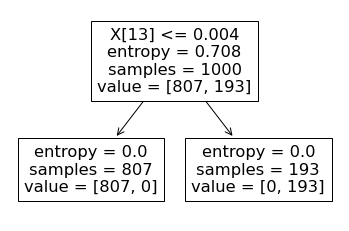

In [94]:
tree.plot_tree(t)

In [95]:
for max_depth in range(1,20):
    t = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv = 7)
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std() *2))

Max depth: 1, Accuracy: 1.00 (+/- 0.00)
Max depth: 2, Accuracy: 1.00 (+/- 0.00)
Max depth: 3, Accuracy: 1.00 (+/- 0.00)
Max depth: 4, Accuracy: 1.00 (+/- 0.00)
Max depth: 5, Accuracy: 1.00 (+/- 0.00)
Max depth: 6, Accuracy: 1.00 (+/- 0.00)
Max depth: 7, Accuracy: 1.00 (+/- 0.00)
Max depth: 8, Accuracy: 1.00 (+/- 0.00)
Max depth: 9, Accuracy: 1.00 (+/- 0.00)
Max depth: 10, Accuracy: 1.00 (+/- 0.00)
Max depth: 11, Accuracy: 1.00 (+/- 0.00)
Max depth: 12, Accuracy: 1.00 (+/- 0.00)
Max depth: 13, Accuracy: 1.00 (+/- 0.00)
Max depth: 14, Accuracy: 1.00 (+/- 0.00)
Max depth: 15, Accuracy: 1.00 (+/- 0.00)
Max depth: 16, Accuracy: 1.00 (+/- 0.00)
Max depth: 17, Accuracy: 1.00 (+/- 0.00)
Max depth: 18, Accuracy: 1.00 (+/- 0.00)
Max depth: 19, Accuracy: 1.00 (+/- 0.00)
